In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np  
import PositionLimits
from os import listdir
from os.path import isfile, join


In [41]:
def GetSignificantValues(FibreCoordinates):
    
    
    def GetHighestAndLowestLayer(FibreCoordinates):
        HighestLayer = np.array([fibre[0:2] for fibre in FibreCoordinates if (fibre[2]==6.0)])
        LowestLayer  = np.array([fibre[0:2] for fibre in FibreCoordinates if (fibre[2]==1.0)])
        return HighestLayer, LowestLayer    
    
    
    HighestLayer, LowestLayer = GetHighestAndLowestLayer(FibreCoordinates)
    
    HighestLayer_Maximum = np.amax(   HighestLayer[:,1])
    HighestLayer_Average = np.average(HighestLayer[:,1])
    LowestLayer_Minimum  = np.amin(    LowestLayer[:,1])
    LowestLayer_Average  = np.average( LowestLayer[:,1])

    HighestLayer_Distance_using_Max = PositionLimits.UPPER_LIMIT - HighestLayer_Maximum 
    HighestLayer_Distance_using_Avg = PositionLimits.UPPER_LIMIT - HighestLayer_Average 
    LowestLayer_Distance_using_Min  = LowestLayer_Minimum  - PositionLimits.LOWER_LIMIT
    LowestLayer_Distance_using_Avg  = LowestLayer_Average  - PositionLimits.LOWER_LIMIT
    
    SignificantValues = [HighestLayer_Distance_using_Max,
                         HighestLayer_Distance_using_Avg,
                         LowestLayer_Distance_using_Min,
                         LowestLayer_Distance_using_Avg
                        ]
    
    return SignificantValues

def GetAllSignificantValues(FileLocation):
    DataFiles = [File for File in listdir(FileLocation) if (isfile(join(FileLocation, File)) and File[0] !='.')]
    DataFiles.sort()
    AllSignificantValues = []
    
    FileIndex = 0
    for File in DataFiles:
        
        FileIndex = FileIndex+1
        FibreCoordinates  =np.array(pd.read_csv(join(FileLocation,File), 
                                            sep='	',
                                            header=None,
                                            usecols=[1,2,6]
                                           )  
                               )
        SignificantValues = GetSignificantValues(FibreCoordinates)
        SignificantValues.insert(0,FileIndex)
        AllSignificantValues.append(SignificantValues)
    
    return AllSignificantValues

In [43]:
FileLocation ='FishedFibreResults/'
ObtainedValues = np.array(GetAllSignificantValues(FileLocation))
Values = ObtainedValues.transpose()

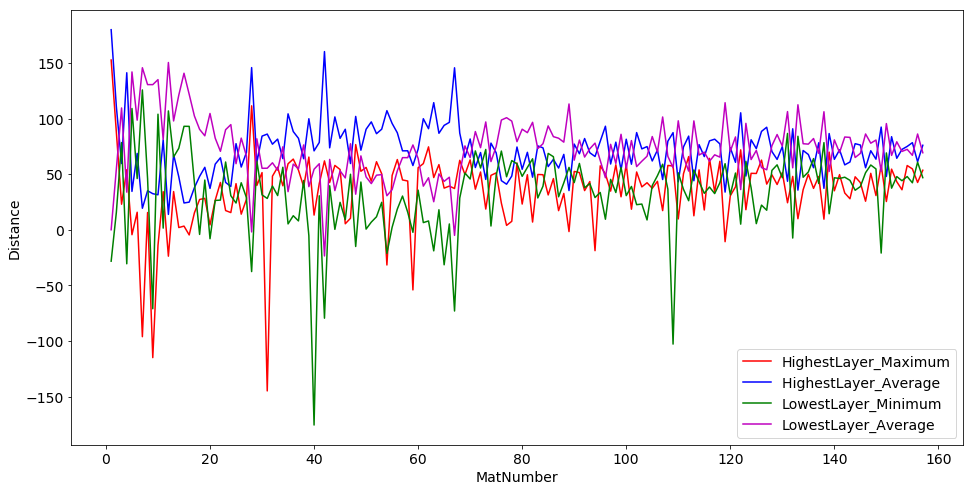

In [49]:

plt.rcParams["figure.figsize"] = (16, 8)
plt.rcParams["font.size"] = 14
plt.plot(Values[0], Values[1], 'r',  label="HighestLayer_Maximum") 
plt.plot(Values[0], Values[2], 'b',  label="HighestLayer_Average " )
plt.plot(Values[0], Values[3], 'g',  label="LowestLayer_Minimum") 
plt.plot(Values[0], Values[4], 'm',  label="LowestLayer_Average" )

plt.legend(loc='best')
plt.xlabel("MatNumber")
plt.ylabel("Distance")

### 